In [1]:

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from matplotlib.colors import ListedColormap
from matplotlib import figure
from cycler import cycler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/federal-disasters/database.csv


In [2]:
df = pd.read_csv('../input/federal-disasters/database.csv')
df_time = (df[['County','Disaster Type','Start Date', 'End Date']][0: :])




Considering the rising intensity and quantity of weather events in recent years, caused by a variety of factors, most notably, the affects of increasing GHG emissions, it is important to understand not only the intensity, but also shifts in the type and length of weather events. 

However, it is important to note a few things about the data set before proceeding. 

Firstly, 60 years worth of data, when referring to weather, is insufficient when attempting to investigate changes which occur over much longer cycles. 

Secondly, although the results show signs of an increasing number of weather related emergencies being declared, this is also only in terms of 'declared' emergencies, as in accordance with the US FEMA guidelines. Therefore, it must be taken into account how the quantity of declarations may also have changed/increased over time due to improved technology, alterations in reporting standards, increased populations and more. 
    
  
Research Questions: 
1. Have the types of storms which occur each year changed since 1965? 
2. Has the average length of storms which occur each year changed since 1965?
3. Has the type and duration of winter weather events changed since 1965? 

    
Why is this important? 
Understanding the way in which the types of weather events are changing, and more specifically, shifts in intensity or occurrence of particular storms, allows us to prepare, adapt and ensure resilience during times of change and uncertainty. This becomes especially prudent for instance, when addressing rising temperatures and sea levels, or increasingly intense weather events. 

#Preprocessing
In order to prepare the data for analysis, I've dropped the NaN values, along with other unnecessary columns, and done a little organizing. 

In [3]:
#Number of NaN values          
df_nan = df[['County','Disaster Type','Start Date', 'End Date']].isna().sum()

df_nan.head(4)

County           197
Disaster Type      0
Start Date         0
End Date         342
dtype: int64

In [4]:
len(df_time.index)

46185

We can see a total of 539 NaN values out of 46185 rows.

In [5]:

#NaN values as a percentage as total 
print([(df_nan.sum(axis=0)), str((((539/46185)*100))) +'%'])

df_time.head(10)


[539, '1.1670455775684745%']


,County,Disaster Type,Start Date,End Date
0,NaN,Tornado,05/02/1953,05/02/1953
1,NaN,Tornado,05/15/1953,05/15/1953
2,NaN,Flood,05/29/1953,05/29/1953
3,NaN,Tornado,06/02/1953,06/02/1953
4,NaN,Flood,06/06/1953,06/06/1953
5,NaN,Tornado,06/09/1953,06/09/1953
6,NaN,Tornado,06/11/1953,06/11/1953
7,NaN,Flood,06/11/1953,06/11/1953
8,NaN,Flood,06/19/1953,06/19/1953
9,NaN,Fire,07/02/1953,07/02/1953


Therefore, while some of data NaN values may be in the same row, as a county and end date could both not have values,
even if all NaN represented seperate rows, this would still only equal 1.18%. In turn, I removed all rows with a NaN value, as they don't represent a significant value that could influence results. 

In [6]:
#Remove NaN values
df_time.dropna(subset = ["County", 'End Date'], inplace=True)
df_time.reset_index(0).head(20)

,index,County,Disaster Type,Start Date,End Date
0,89,Clay County,Flood,01/29/1959,01/29/1959
1,181,Alpine County,Flood,12/24/1964,12/24/1964
2,182,Amador County,Flood,12/24/1964,12/24/1964
3,183,Butte County,Flood,12/24/1964,12/24/1964
4,184,Colusa County,Flood,12/24/1964,12/24/1964
5,185,Del Norte County,Flood,12/24/1964,12/24/1964
6,186,El Dorado County,Flood,12/24/1964,12/24/1964
7,187,Glenn County,Flood,12/24/1964,12/24/1964
8,188,Humboldt County,Flood,12/24/1964,12/24/1964
9,189,Lake County,Flood,12/24/1964,12/24/1964


Next, I converted all dates to the proper pd date format so the lengths of emergencies could be caluculated, organized the df, and created a new column with the length of disaster days. Also, since all emergencies reported to start and end on the same day would give a 0 in terms of length, I converted all 0 entries to represent 1, to represent 1 day.  

In [7]:
#Set Date Format
df_time['Start_Date_A'] = pd.to_datetime(df['Start Date'], format='%m/%d/%Y')
df_time['End_Date_A'] = pd.to_datetime(df['End Date'], format='%m/%d/%Y')

df_time.head(5)

,County,Disaster Type,Start Date,End Date,Start_Date_A,End_Date_A
89,Clay County,Flood,01/29/1959,01/29/1959,1959-01-29,1959-01-29
181,Alpine County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24
182,Amador County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24
183,Butte County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24
184,Colusa County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24


In [8]:
#Create new column == Disaster Length
df_time['Disaster_Length'] = (df_time.Start_Date_A - df_time.End_Date_A).dt.days

#Create new column == start year
df_time['Start_year'] = df_time['Start_Date_A'].dt.year

#Replace 0 day values with 1 to indicate a Disaster length of 1 Day
df_time['Disaster_Length'] = df_time['Disaster_Length'].replace({0:1})

#Replace all values with absolute values so all days are represented as positive numeric values
df_time['Disaster_Length'] = df_time['Disaster_Length'].abs()

df_time.head(10)

,County,Disaster Type,Start Date,End Date,Start_Date_A,End_Date_A,Disaster_Length,Start_year
89,Clay County,Flood,01/29/1959,01/29/1959,1959-01-29,1959-01-29,1,1959
181,Alpine County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
182,Amador County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
183,Butte County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
184,Colusa County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
185,Del Norte County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
186,El Dorado County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
187,Glenn County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
188,Humboldt County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964
189,Lake County,Flood,12/24/1964,12/24/1964,1964-12-24,1964-12-24,1,1964


In [9]:
# Locating man-made and non 'natural' disasters, sorting Disaster types, and analyzing value counts

df_time = df_time.rename(columns={'Disaster Type': 'Disaster_Type'})

df_DTypes= df_time['Disaster_Type'].values

df_DTypes=pd.DataFrame(df_DTypes)

df_DType_VCounts=(df_DTypes.value_counts()).sort_values(ascending=True)

df_DType_VCounts.head(20)





Dam/Levee Break        2
Terrorism              5
Human Cause            6
Tsunami                9
Mud/Landslide         10
Chemical              15
Water                 42
Volcano               49
Earthquake           102
Typhoon              114
Other                289
Winter               301
Drought             1289
Tornado             1397
Ice                 1970
Fire                2295
Snow                3564
Hurricane           8733
Flood               9213
Storm              16242
dtype: int64

We can see there are a number of emergencies that are not directly environmentally related (althought some may be debatable depending on your perspective). However, they are not relevant for answering the research questions. 

In [10]:
#List of all 'Natural' Disasters
df_DType_Natural=(df_DType_VCounts.drop(['Human Cause', 'Chemical', 'Dam/Levee Break', 'Terrorism','Other'],axis=0)).sort_values(ascending=True)


#Removing non-natural disasters from main df_time
df_time = df_time[(df_time.Disaster_Type != 'Human Cause') & (df_time.Disaster_Type != 'Chemical') & (df_time.Disaster_Type != 'Dam/Levee Break') & (df_time.Disaster_Type != 'Terrorism') & (df_time.Disaster_Type != 'Other') ]




/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


#Analysis

Starting with some more general visualizations, I plotted the number of weather emergencies declared per year, and the average length of such, to see if any particular patterns emerged. 



<AxesSubplot:title={'center':'Number of Disasters Declared 1958-2017'}>

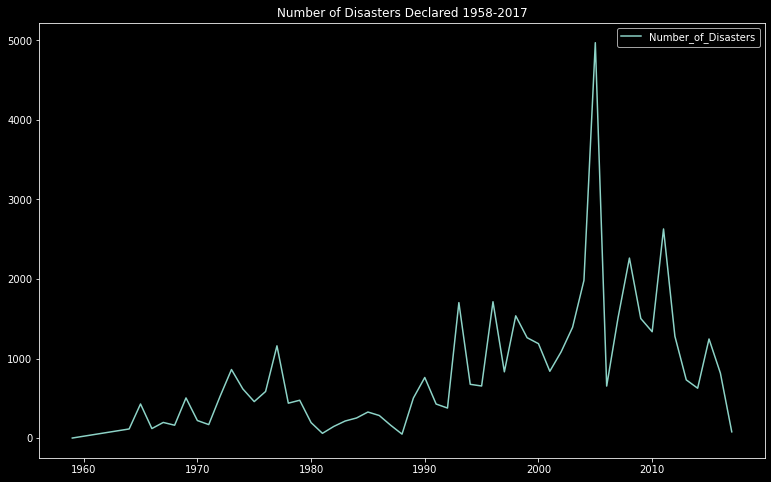

In [11]:
#Number of disasters declared per year
yearly_dcount = df_time.groupby(['Start_year']).size()

yearly_dcount=pd.DataFrame(yearly_dcount)
yearly_dcount.columns=['Number_of_Disasters']


#Visualizing change in total number of disasters over time 
plt.style.use('dark_background')

yearly_dcount.reset_index().plot('Start_year','Number_of_Disasters', title='Number of Disasters Declared 1958-2017', xlabel='', figsize=(13, 8))



Althought the data doesn't represent a significant time period, especially as there seems to be a change in terms of the reporting that happened before and after roughly 1990, lets train and test a simple linear regression model to more clearly illustrate changes over time and see how accurate the predictions are.

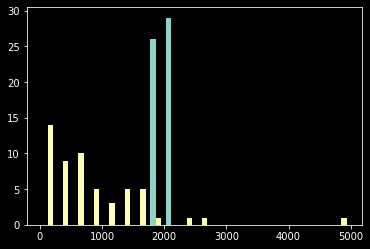

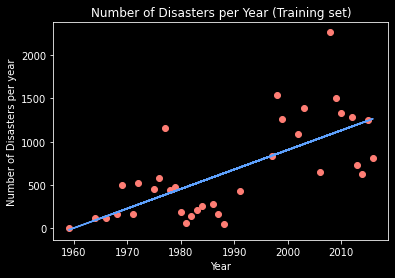

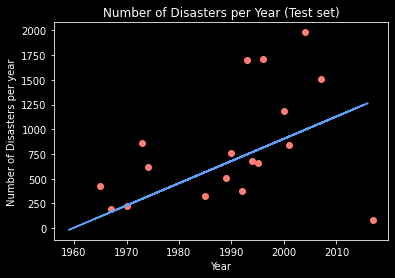

In [12]:
#Number of disasters declared per year
yearly_dcount = df_time.groupby(['Start_year']).size()

yearly_dcount=pd.DataFrame(yearly_dcount)
yearly_dcount.columns=['Number_of_Disasters']

yearly_dcount= yearly_dcount.reset_index()

#Data distribution
plt.hist(yearly_dcount, bins=20, rwidth=.7)
plt.show()

#Removing Outliers

yearly_dcount['zscore'] = (yearly_dcount.Number_of_Disasters - yearly_dcount.Number_of_Disasters.mean() )/yearly_dcount.Number_of_Disasters.std()
df_deviations=yearly_dcount[yearly_dcount['zscore']>2]
df_lreg = (yearly_dcount[yearly_dcount['zscore']<2])

           
#Visualizing change in total number of disasters over time 
X2 = df_lreg.iloc[:, :1].values
y2 = df_lreg.iloc[:, 1:2].values


from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 1/3, random_state = 0)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)


# Predicting the Test set results
y_pred = regressor.predict(X2_test)

# Visualising the Training set results
plt.scatter(X2_train, y2_train, color = '#FE7D74')
plt.plot(X2_train, regressor.predict(X2_train), color = '#5DA0FC')
plt.title('Number of Disasters per Year (Training set)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters per year')
plt.show()


# Visualising the Test set results
plt.scatter(X2_test, y2_test, color = '#FE7D74')
plt.plot(X2_train, regressor.predict(X2_train), color = '#5DA0FC')
plt.title('Number of Disasters per Year (Test set)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters per year')
plt.show()


<AxesSubplot:title={'center':'Change in Average Length of Disasters Declared 1958-2017'}>

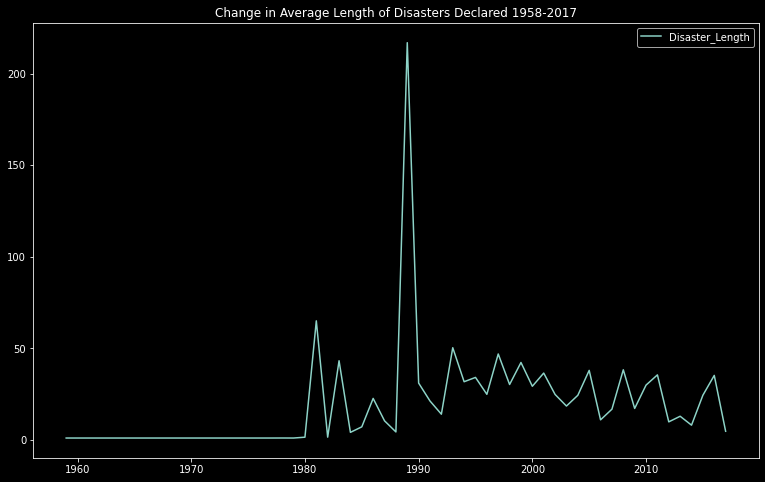

In [13]:
#Dataframe with mean disaster length for each year
df_yearly_mean_len = df_time.groupby(['Start_year']).mean()
df_yearly_mean_len.reset_index().plot('Start_year','Disaster_Length', title='Change in Average Length of Disasters Declared 1958-2017', xlabel='', figsize=(13, 8))

As shown in the 2 figures above, the average length of weather emergencies has stayed relatively consistent throughout the data period, while the number of weather emergencies being declared appears to be increasing.

The key question at hand is, as to what extent is the difference between the increase in emergencies, and the increase in declarations.

As previously mentioned, since this is the reported number of emergencies, and not the number of weather events that occurred, a variety of other factors are involved, especially as multiple counties can report the same disaster. Accordingly, from another perspective, the increased reporting by a higher number of counties, could be due to changes in population, weather reporting technology/protocol, or, that the storms are potentially becoming larger in geographical area and therefore, affecting a greater number of counties. 

Subsequently, in order to get a little more out of this data set, let's look at the types of emergencies being reported.

Lastly, it is important to note that from 1960 - 1980, all storms were reported as 1 day events, making that section untelling and insignificant. If we were to continue analyzing that section, we would remove that period from the dataframe. 

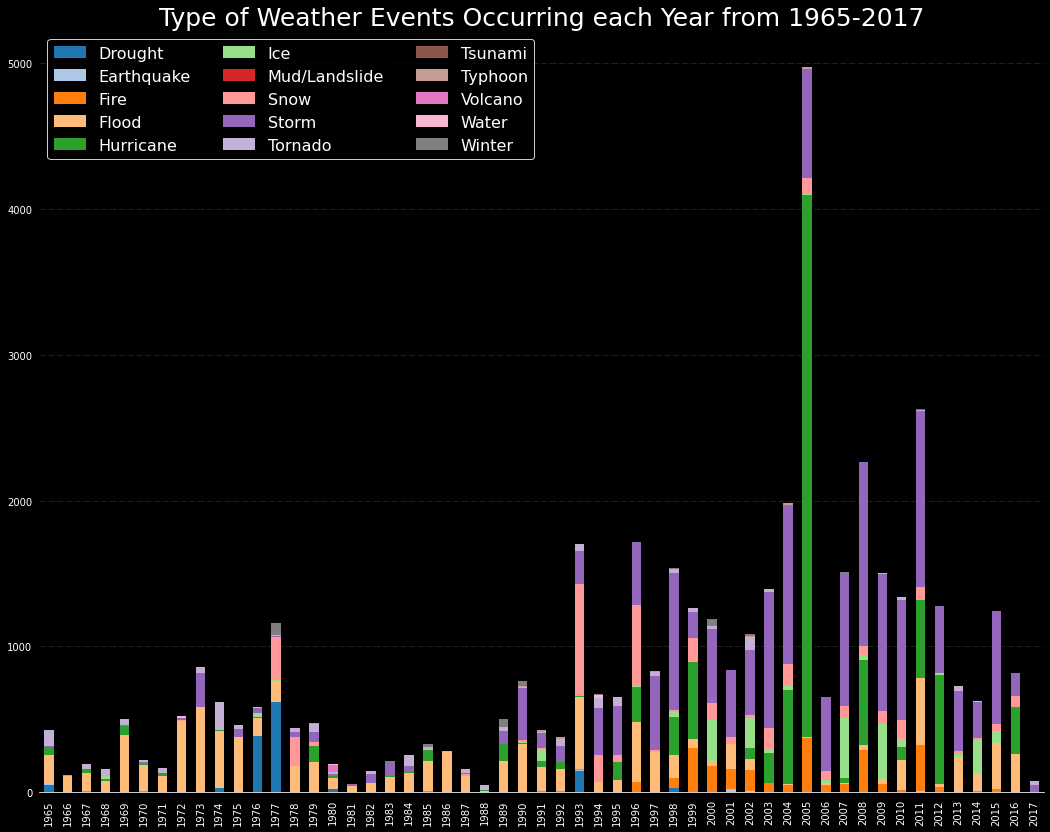

In [20]:
#Preprocessing to analyze the change in the number of each type of environmental weather emergency 

df_yearly_tcount = df_time.groupby(['Start_year', 'Disaster_Type']).size()
yearly_tcount=pd.DataFrame(df_yearly_tcount)
yearly_tcount=yearly_tcount.reset_index()
yearly_tcount = yearly_tcount.drop(labels = [0, 1], axis=0 )
yearly_tcount.columns = ['Start_year', 'Disaster_Type','Event_Count']

#Visualization
fig, ax = plt.subplots(figsize=(18,14))


colors = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f']

cmap = ListedColormap(colors, name="custom")

yearly_tcount.pivot(index='Start_year', columns = 'Disaster_Type', values='Event_Count' ).plot.bar(stacked=True, ax=ax, zorder=3,cmap=cmap)
ax.legend(ncol=3, edgecolor='w', prop={'size': 16})
[ax.spines[s].set_visible(False) for s in ['top','right', 'left']]
ax.tick_params(axis='both', left=False, bottom=False)
plt.title(label='Type of Weather Events Occurring each Year from 1965-2017', size=25)

ax.grid(axis='y', dashes=(8,3), color='grey', alpha=0.3)
plt.xlabel(xlabel='')
fig.savefig('Change_in_Type_of_Weather_Events')






While 2005 clearly represents hurricane Katrina, it is interesting to see the number of hurricanes and 'storms' being declared as an emergency increasing. With the number of hurricanes incresaing, it is likely that 'storm', while being ambiguous, could illustrate Tropical Storms, and also be a sign of a rising intensity of weather events, that previously, had a weaker impact on counties and were therefore not declared as emergencies. 

Beginning in 1999 the number of fire related emergencies increases while the number of floods decreases. In turn, it would be interesting to contrast this analysis with data on rising temperatures and rainfall changes.




/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


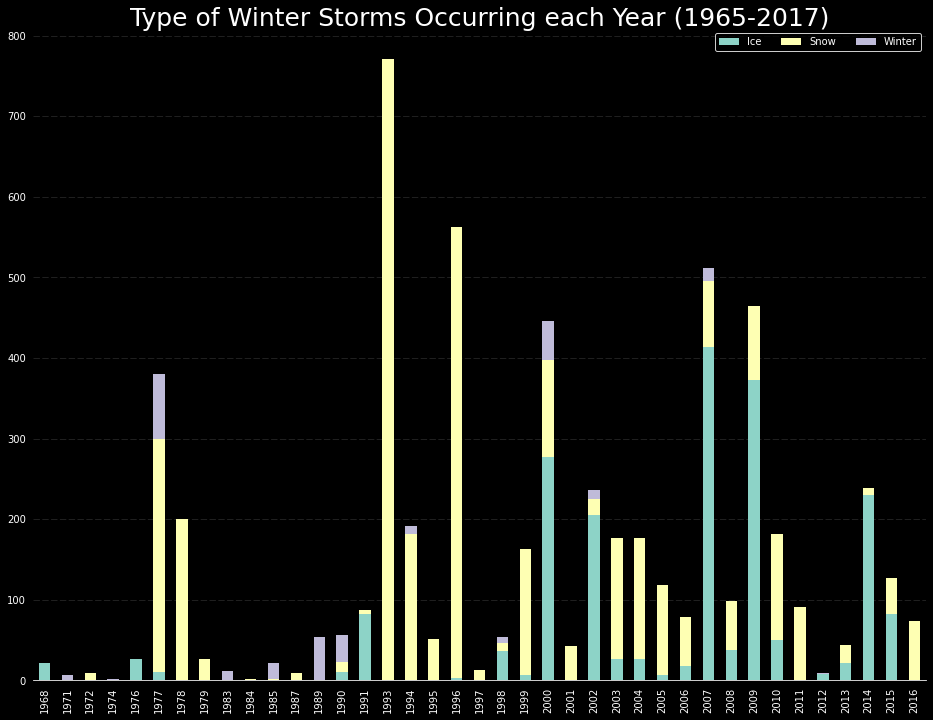

In [15]:
#Have have the type of winter storms changed since 1965?
df_winter = df_time[(df_time['Disaster_Type'] == 'Winter') | (df_time['Disaster_Type'] == 'Snow') | (df_time['Disaster_Type'] == 'Ice')]

df_winter.drop(columns=['Start_Date_A', 'End_Date_A'], axis=1, inplace=True)

df_winter.drop_duplicates(keep='first')

#How many of each type of winter storm happened each year? 
df_winter_tcount= df_winter.groupby(['Start_year', 'Disaster_Type']).size()

df_winter_tcount=pd.DataFrame(df_winter_tcount)

df_winter_tcount = df_winter_tcount.reset_index()

df_winter_tcount.columns=['Start_Year','Disaster_Type','Event_Count']

fig, ax = plt.subplots(figsize=(16,12))

df_winter_tcount.pivot(index='Start_Year', columns = 'Disaster_Type', values='Event_Count').plot.bar(stacked=True, ax=ax, zorder=3)
ax.legend(ncol=3, edgecolor='w')
[ax.spines[s].set_visible(False) for s in ['top','right', 'left']]
ax.tick_params(axis='both', left=False, bottom=False)
plt.title('Type of Winter Storms Occurring each Year (1965-2017)', size=25, pad=2)
plt.xlabel(xlabel='')
ax.grid(axis='y', dashes=(8,3), color='grey', alpha=0.3)








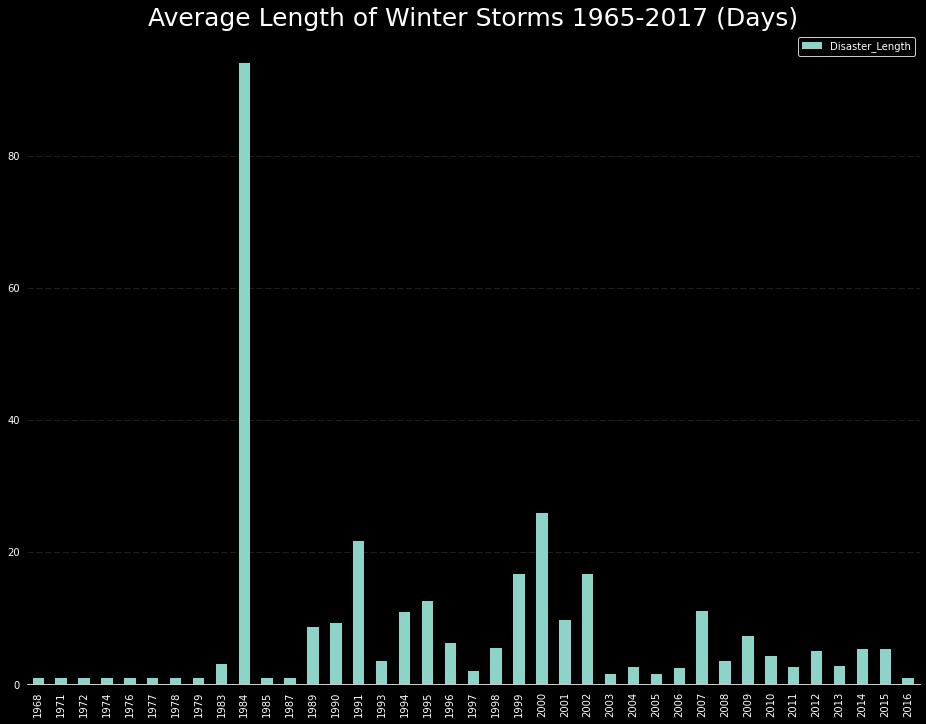

In [16]:
df_winter_length = df_winter.drop(columns=['County','Disaster_Type'])


df_winter_length = df_winter_length.groupby(['Start_year']).mean()


fig, ax = plt.subplots(figsize=(16,12))
df_winter_length.plot.bar(ax=ax, zorder=3)

ax.legend(ncol=3, edgecolor='w')
[ax.spines[s].set_visible(False) for s in ['top','right', 'left']]
ax.tick_params(axis='both', left=False, bottom=False)
plt.title('Average Length of Winter Storms 1965-2017 (Days)', size=25)
ax.grid(axis='y', dashes=(8,3), color='grey', alpha=0.3)
plt.xlabel(xlabel='')
fig.savefig('Change_in_Average Length_of_Winter_Events')


When looking specifically at Winter storms, it appears that the types of storms has shifted, with more ice related emergencies being declared. Secondly, the data illustrates a decrease in the average length of winter emergencies in the last 30 years.

Moreover, while the visualizations above allowed for the analysis of the length and types of winter emergencies, I was also curious if a shift in seasons had been occurring, with winter possibly starting later in Winter and pushing further into Spring. 

In turn, I first took a look at which months had the most winter storms, and how the types were distributed. 

Secondly, I zoomed out for a longtitudal approach to see if the months with the most winter weather events being declared changed between 1965 and 2017. 

(1-12 represent the months of the year for both graphs) 


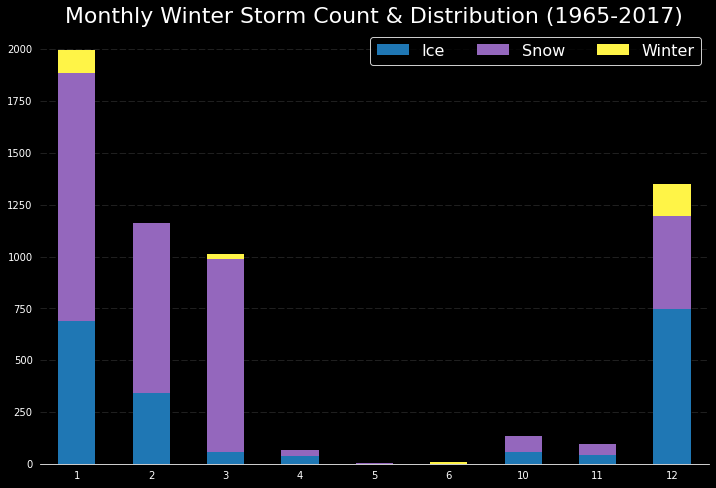

In [17]:
df_winter = df_time[(df_time['Disaster_Type'] == 'Winter') | (df_time['Disaster_Type'] == 'Snow') | (df_time['Disaster_Type'] == 'Ice')]

df_winter.drop_duplicates(keep='first')

df_winter = df_winter.reset_index(drop=True, inplace=False)

#Change in Length of Winter Weather Events from 1965 - 2017

df_winter['day'] = df_winter['Start_Date_A'].dt.day
df_winter['month'] = df_winter['Start_Date_A'].dt.month
df_winter['year'] = df_winter['Start_Date_A'].dt.year


df_winter_start = df_winter.drop(columns=['County', 'Start_Date_A','End_Date_A', 'Start_year', 'Disaster_Length',])

df_winter_plot = df_winter_start.pivot_table(index='month', columns='Disaster_Type', values='day', aggfunc='count')


fig, ax = plt.subplots(figsize=(12,8))

colors = [
'#1f77b4','#ff7f0e', '#FF665A', '#2ca02c', '#28a2a6',
    '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#FFF447']

cmap = ListedColormap(colors, name="custom")

df_winter_plot.plot.bar(stacked=True, ax=ax, zorder=3, cmap=cmap, rot=0)

ax.legend(ncol=3, edgecolor='w', prop={'size': 16})
[ax.spines[s].set_visible(False) for s in ['top','right', 'left']]
ax.tick_params(axis='both', left=False, bottom=False)
plt.title(label='Monthly Winter Storm Count & Distribution (1965-2017)', size=22)
plt.xlabel(xlabel="")
ax.grid(axis='y', dashes=(8,3), color='grey', alpha=0.3)





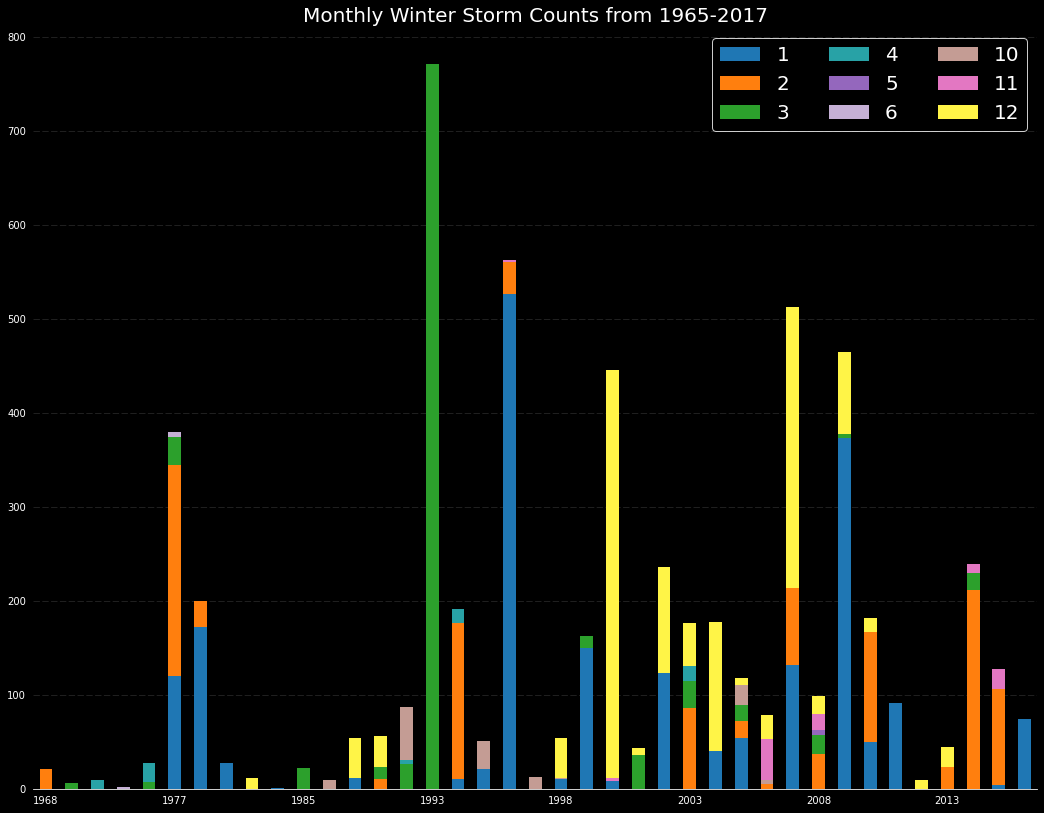

In [18]:

df_winter_start = df_winter.drop(columns=['County', 'Start_Date_A','End_Date_A', 'Start_year', 'Disaster_Length',])
df_winter_plot2 = df_winter_start.pivot_table(index='year', columns='month', values='day', aggfunc='count')


fig, ax = plt.subplots(figsize=(18,14))


colors = [
    '#1f77b4','#ff7f0e', '#FF665A', '#2ca02c', '#28a2a6',
    '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#FFF447']

cmap = ListedColormap(colors, name="custom")

df_winter_plot2.plot.bar(stacked=True, ax=ax, zorder=3, cmap=cmap, rot=0)
ax.legend(ncol=3, edgecolor='w', prop={'size': 20})
[ax.spines[s].set_visible(False) for s in ['top','right', 'left']]
ax.tick_params(axis='both', left=False, bottom=False)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
        
plt.title(label='Monthly Winter Storm Counts from 1965-2017', size=20)
plt.xlabel(xlabel="")
ax.grid(axis='y', dashes=(8,3), color='grey', alpha=0.3)

While it is not surprising that Dec (1) and Jan (2), had the most winter emergencies, when looking at the second illustration that depicts how many emergencies were declared each month, in a given year, it is difficult to contend that the shift I hypothesized has fully formed. However, it should be noted that in the past 10 years, the December (12), weather emergencies has declined while February emergencies have increased, a longer time frame would is need to confirm that a seasonal shift is taking place. 

#Conclusion

While a longer timeframe data set would indeed provide more insights and depth to the observations, even throughout the past 60 years, a change in the emergencies being declared is present.

The question remains as to the variety of influencing variables and their weights, especially in this case, in terms of the declaration protocols and technological changes. 

Stay tuned for upcoming projects on on water conservation and forest fires. 